In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [32]:
def KMeansClustering(input_list,cluster_representation_list,max_iter=100):
    try:
        if input_list.ndim!=2 or cluster_representation_list.ndim!=2: 
            raise Exception("Expected the input list and list of cluster representations to be of dimension 2")
        elif input_list.shape[1]!=cluster_representation_list.shape[1]:
            raise Exception("The dimensions of the input and cluster representaion did not match")
    except Exception as e:
        print(e)
    else:
        num_clusters=len(cluster_representation_list)

        # Assigining color for each cluster
        
        cmap=plt.get_cmap('tab10')
        indices = np.random.choice(range(cmap.N), size=10, replace=False)
        color_of_each_cluster = [cmap.colors[i] for i in indices]



        while True and max_iter:
            input_points_in_each_cluster=[[] for i in range(num_clusters)]

            ## Assign each of the input point to the nearest cluster
            ## Considering the distance as euclidean distance 

            for input_point in input_list:
                distance_from_each_cluster=[]
                for cluster_representation in cluster_representation_list:
                    distance_from_each_cluster.append(np.sum((cluster_representation-input_point)**2))
                
                min_distance_idx=np.argmin(np.array(distance_from_each_cluster))

                ## Assigning the input point to its nearest cluster

                input_points_in_each_cluster[min_distance_idx].append(list(input_point))
                
            ## Plotting each cluster representation

            # plt.figure(figsize=(16,16))

            start=0

            for cluster_representation in cluster_representation_list:
                plt.scatter(cluster_representation[0],cluster_representation[1],marker='*',color=color_of_each_cluster[start])
                start+=1

            time.sleep(1)
            
            ## Plot after assigning the points to each cluster
            
            start=0

            for points_in_a_cluster in input_points_in_each_cluster:
                plt.scatter([x for [x,y] in points_in_a_cluster],[y for [x,y] in points_in_a_cluster],color=[color_of_each_cluster[start] for i in range(len(points_in_a_cluster))])
                start+=1

            ## Updating the cluster representation in order to reduce the total cluster cost
            
            flag=True

            for i in range(num_clusters):
                if len(input_points_in_each_cluster[i]):
                    temp=np.floor(np.mean(input_points_in_each_cluster[i],axis=0))
                    if not all(temp==np.array(cluster_representation_list[i])):
                        flag=False 
                    cluster_representation_list[i]=temp
            
            plt.show()

            if flag:
                break
            max_iter-=1


In [33]:
input_list=np.random.randint(-1000,1000,size=(20,2),dtype='int')
cluster_representation_list=np.random.randint(-1000,1000,size=(5,2),dtype='int')

In [34]:
input_list

array([[-916, -911],
       [ 186,  687],
       [ 395,  625],
       [-113, -834],
       [ 510,  258],
       [-670, -291],
       [ 179,  266],
       [ 961,   47],
       [ 923,  999],
       [ -27, -553],
       [-290, -169],
       [ 788,  291],
       [ 929, -441],
       [-315,    8],
       [-848,  779],
       [ 677,  657],
       [-348, -547],
       [-368,  626],
       [ -65, -396],
       [ 464,  191]])

In [35]:
cluster_representation_list

array([[-685,  481],
       [-461, -513],
       [  19,  161],
       [ -96, -852],
       [ 377,  774]])

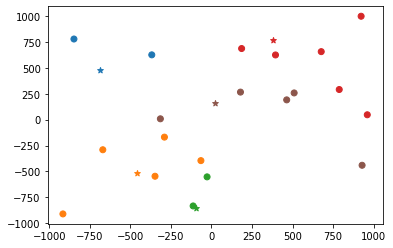

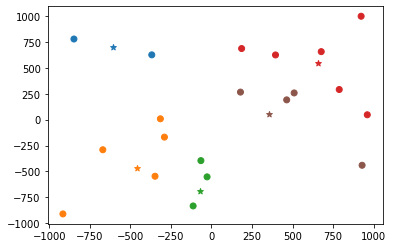

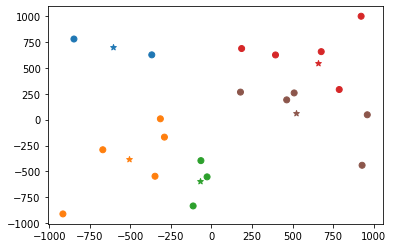

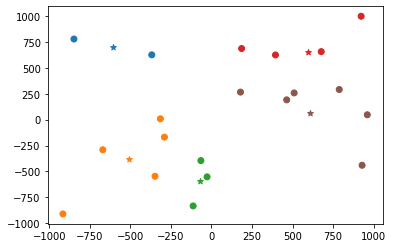

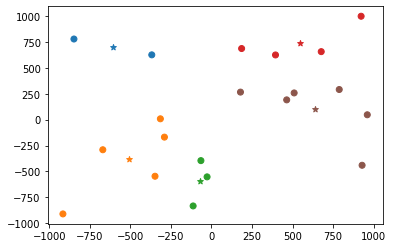

In [36]:
KMeansClustering(input_list,cluster_representation_list)